# Image Pyramid

# In OpenCV, Image Pyramids are a series of images with progressively reduced resolutions, allowing for multi-scale image analysis:

**Gaussian Pyramid:** Successive downsampling of an image, smoothing and reducing its size.
    
**Laplacian Pyramid:** Difference between successive layers in a Gaussian pyramid, highlighting edges.

Original Image:


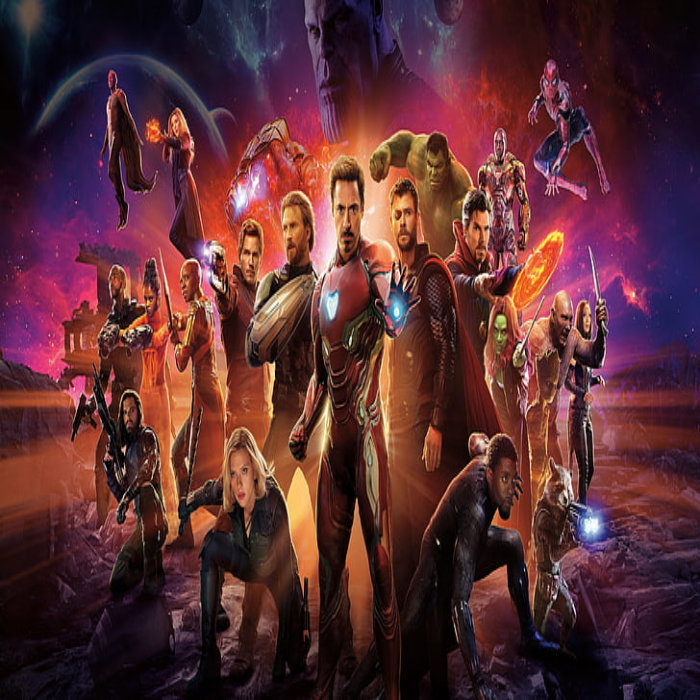

PyrDown Level 1:


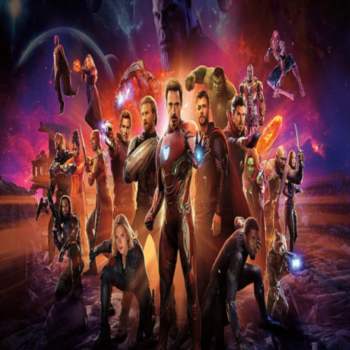

PyrDown Level 2:


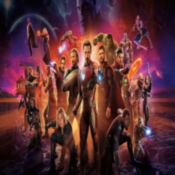

PyrUp from Level 3:


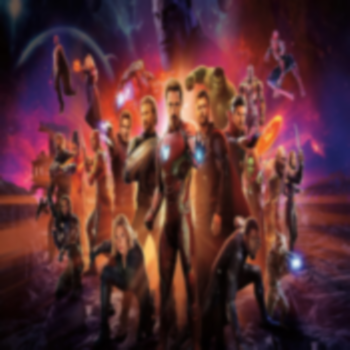

PyrUp from Level 4:


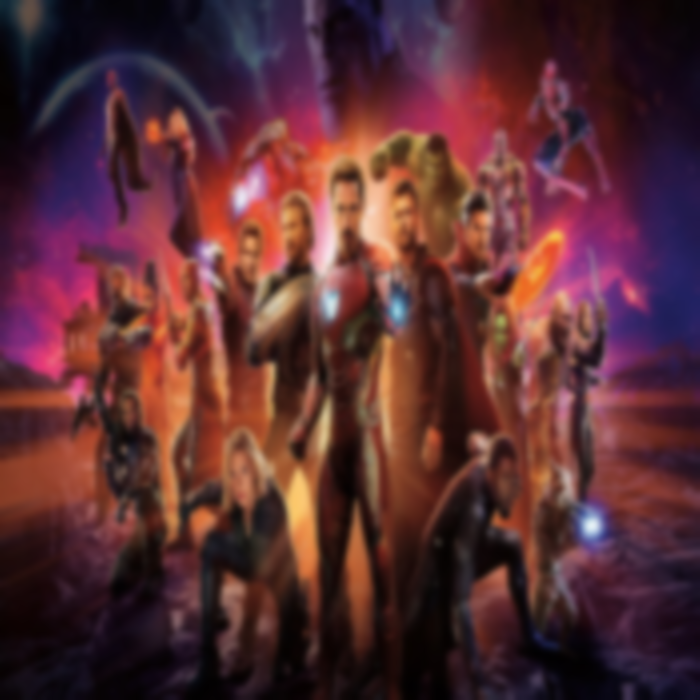

In [6]:
#Image Pyramids in OpenCV
"""
We use Image Pyramid because somethimes we work on same imge
but different resolution.e.g. searching face, eye in an image
and it vary image to image so in this case we create a set
of images with diff. resolution which is called pyramid.
We also use these pyramids to blends the images.
"""
#There are two types of Image Pyramid-
# 1) Gaussian Pyramid and 2) Laplacian Pyramids

import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For image display in Colab

# Load image
img = cv2.imread("/content/ave2.jpg")  # Update with the correct filename

# Check if image is loaded successfully
if img is None:
    print("Error: Image not found.")
else:
    # Resize image to 700x700
    img = cv2.resize(img, (700, 700))

    # Gaussian Pyramid - downsampling
    pd1 = cv2.pyrDown(img)  # First level downsample
    pd2 = cv2.pyrDown(pd1)  # Second level downsample

    # Gaussian Pyramid - upsampling
    pu1 = cv2.pyrUp(pd2)    # Upsample pd2 to the next level
    pu2 = cv2.pyrUp(pu1)    # Further upsample pu1

    # Display images using cv2_imshow
    print("Original Image:")
    cv2_imshow(img)

    print("PyrDown Level 1:")
    cv2_imshow(pd1)

    print("PyrDown Level 2:")
    cv2_imshow(pd2)

    print("PyrUp from Level 3:")
    cv2_imshow(pu1)

    print("PyrUp from Level 4:")
    cv2_imshow(pu2)


Original Image:


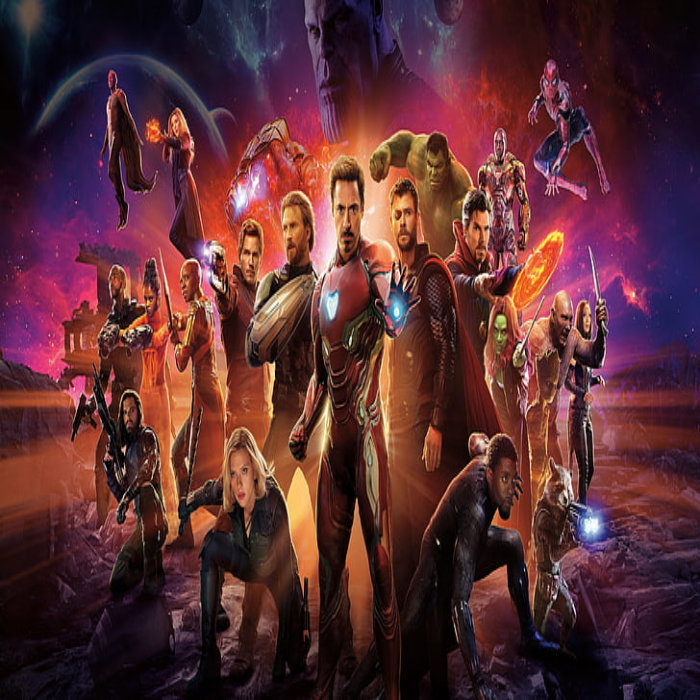

Laplacian Level 1:


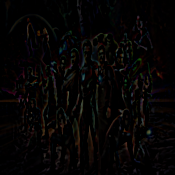

Laplacian Level 2:


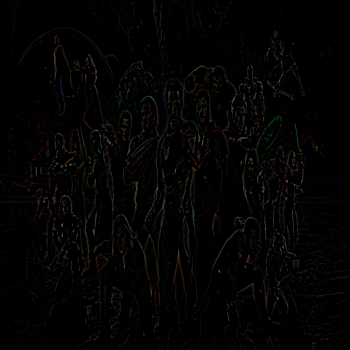

Laplacian Level 3:


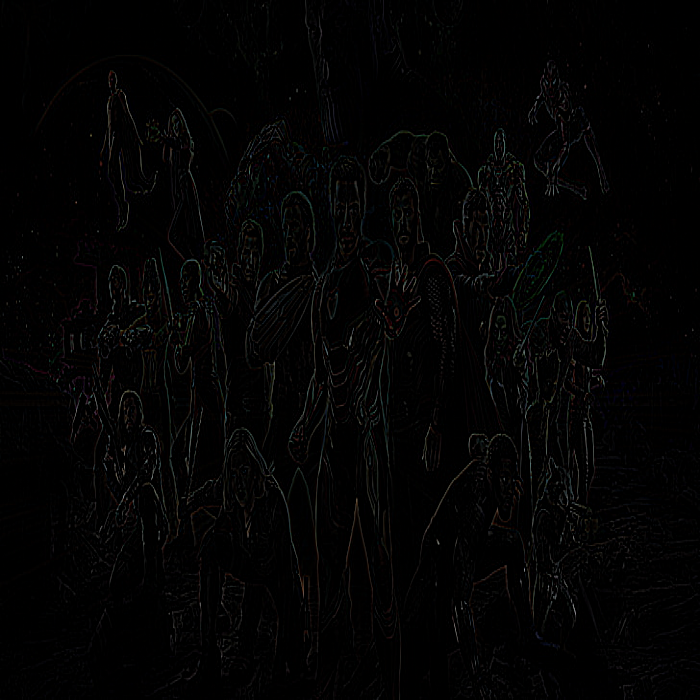

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For image display in Colab

# Load the image
img = cv2.imread("/content/ave2.jpg")  # Replace with the correct file path

# Check if image is loaded successfully
if img is None:
    print("Error: Image not found.")
else:
    # Resize the image to make the pyramid easier to view
    img = cv2.resize(img, (700, 700))

    # Gaussian Pyramid
    gaussian_pyramid = [img]
    for i in range(3):  # You can increase the range for more levels
        img = cv2.pyrDown(img)
        gaussian_pyramid.append(img)

    # Laplacian Pyramid
    laplacian_pyramid = []
    for i in range(3, 0, -1):
        # Upsample the Gaussian image to the previous level
        gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i])
        # Ensure expanded image matches the dimensions of the previous Gaussian image
        gaussian_expanded = cv2.resize(gaussian_expanded, (gaussian_pyramid[i-1].shape[1], gaussian_pyramid[i-1].shape[0]))
        # Calculate Laplacian (current Gaussian level - expanded image)
        laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)
        laplacian_pyramid.append(laplacian)

    # Display results
    print("Original Image:")
    cv2_imshow(gaussian_pyramid[0])

    for i, lap in enumerate(laplacian_pyramid, 1):
        print(f"Laplacian Level {i}:")
        cv2_imshow(lap)


Gaussian Pyramid Creation: The code starts by creating a
Gaussian Pyramid with 3 levels.
    
Laplacian Pyramid Creation: Each Laplacian level is obtained by expanding the next Gaussian level and subtracting it from the current level.
    
Display Images: The original image and each Laplacian level are displayed using cv2_imshow in Google Colab.

This code builds a 3-level Laplacian Pyramid but can be expanded by increasing the range in the Gaussian Pyramid loop. Let me know if you need further adjustments!